### MERT PEKEY 23646

# CS210 PROJECT

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy import stats
from os.path import join
import reverse_geocoder as rg
from geopy.distance import geodesic

sns.set(style="whitegrid")

%matplotlib inline

In [0]:
cd /Users/beyhanpekey/Desktop

/Users/beyhanpekey/Desktop


In [0]:
d_path = "./data"
filename = "/Users/beyhanpekey/Desktop/taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

In [0]:
rows,columns=df.shape
print("number of rows: {}, number of columns: {}".format(rows, columns))

number of rows: 118185, number of columns: 11


In [0]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [0]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [0]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [0]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


We can see such statistical information about data. However we are not interested in some of the colums statistics. Therefore, let's only look at the informations we want to see separately than what we don't.

In [0]:
df_stats=df[['passenger_count','trip_duration']]
df_stats.describe()

,passenger_count,trip_duration
count,118185.000000,118185.000000
mean,1.657148,927.186310
std,1.313844,3118.710246
min,0.000000,1.000000
25%,1.000000,393.000000
50%,1.000000,652.000000
75%,2.000000,1048.000000
max,6.000000,86366.000000


##### Passenger Count
We can say that usually more than 1 passenger uses taxi by looking the mean of passenger_count which is 1.65. However, it is clear that usually this number is not more than 2 by looking the median.

##### Trip Duration
The average trip duration is 927 second which is little bit more than 15 minutes. This means passengers don't uses taxis for short trips so much. In addition, maximum trip duration which is 24 hours(1 day) is impressive and astonishing.



### Reverse Geocoder
We get the pickup and dropoff districts with using reverse geocoder algorithm by using the coordinates. Therefore, we can use this information to find another information for our data to use them for statistical research.

In [0]:
temp=[]
for j in range(118185):
    results=rg.search((df.at[j,'pickup_latitude'],df.at[j,'pickup_longitude']), mode=1)
    d=list(results[0].items())
    temp.append(d[2][1])
df["pickup_district"]=temp

temp2=[]
for m in range(118185):
    results=rg.search((df.at[m,'dropoff_latitude'],df.at[m,'dropoff_longitude']), mode=1)
    d=list(results[0].items())
    temp2.append(d[2][1])
df["dropoff_district"]=temp2

Loading formatted geocoded file...


## Top 5 Pickup and Dropoff Districts
We can see that passengers prefers to use taxi usually in Manhattan. We can easily get that the taxi trips are one of the most important effect of the traffic in Downtown.

In [0]:
top5pickup = df.groupby(by="pickup_district").size().reset_index(name='counts')
top5pickup.sort_values(by='counts', ascending=False, inplace=True)
top5pickup = top5pickup.reset_index(drop=True)
top5pickup.head()

,pickup_district,counts
0,Manhattan,45329
1,New York City,34625
2,Long Island City,17787
3,Weehawken,11334
4,The Bronx,2777


The top 5 number of pickup and dropoff districts are almost the same so it gives us that passengers don't usually use taxi for long trips in New York.

In [0]:
top5dropoff = df.groupby(by="dropoff_district").size().reset_index(name='counts')
top5dropoff.sort_values(by='counts', ascending=False, inplace=True)
top5dropoff = top5dropoff.reset_index(drop=True)
top5dropoff.head()

,dropoff_district,counts
0,Manhattan,44478
1,New York City,31082
2,Long Island City,19919
3,Weehawken,10621
4,Brooklyn,2059


## Distances Of Taxi Trips with Geopy
With using geodesic in geopy, we get the distances of the taxi trips by using pickup and dropoff coordinates.

In [0]:
temp3=[]
for k in range(118185):
    temp3.append(geodesic((df.at[k,'pickup_latitude'],df.at[k,'pickup_longitude']),(df.at[k,'dropoff_latitude'],df.at[k,'dropoff_longitude'])).miles)
df['distance']=temp3

In [0]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103


## The Time Of The Day For Taxi Usage

We can get more clear look to taxi trips with getting the time of day, so we can use this information to analyze our data and to see how distance and the duration of the trip change with the time.

In [0]:
df['time_of_day']=pd.DatetimeIndex(df['pickup_datetime']).hour.astype(str)

In [0]:
word=''
m=0
while(m<=23):
    if(m<7 or m==23):
        word='late_night'
    elif(m>=7 and m<9):
        word='rush_hour_morning'
    elif(m>=9 and m<16):
        word='afternoon'
    elif(m>=16 and m<18):
        word='rush_hour_evening'
    elif(m>=18 and m<23):
          word='evening'
    df.loc[df['time_of_day'] == str(m),'time_of_day'] = word
    m=m+1

In [0]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon


## Is The Average Distance Affected By The Time Of Day?

In [0]:
timecount = df.groupby(by="time_of_day").size().reset_index(name='counts')
timecount.sort_values(by='counts', ascending=False, inplace=True)
timecount = timecount.reset_index(drop=True)

time_group = df.groupby(by='time_of_day').sum().reset_index()
avg_dist = time_group['distance'] / timecount['counts']
timecount['average_distance']=avg_dist
timecount

,time_of_day,counts,average_distance
0,afternoon,39752,1.932456
1,evening,35194,2.099076
2,late_night,21528,2.558580
3,rush_hour_evening,11564,2.077128
4,rush_hour_morning,10147,1.943823


We get the average distance with dividing total distance of the time of days to the amount of that time in the data. However, times are not ordered. Therefore, make them ordered and get clear results. In addition, this helps us to show data in graph better.

In [0]:
newtime=['rush_hour_morning','afternoon','rush_hour_evening','evening','late_night']
newavgdist=[1.943823,1.932456,2.077128,2.099076,2.558580]
newcounts=[10147, 39752, 11564, 35194, 21528]
newtimecount=pd.DataFrame(columns=['time_of_day', 'average_distance'])
newtimecount['time_of_day'] = newtime
newtimecount['amount_of_time'] = newcounts
newtimecount['average_distance'] = newavgdist
newtimecount

,time_of_day,average_distance,amount_of_time
0,rush_hour_morning,1.943823,10147
1,afternoon,1.932456,39752
2,rush_hour_evening,2.077128,11564
3,evening,2.099076,35194
4,late_night,2.558580,21528


Passengers use taxis for longer distances at later times than the early hours such as morning. We can easily see this with the graph below. As a result, we conclude that the average distance varies as time of the day change.

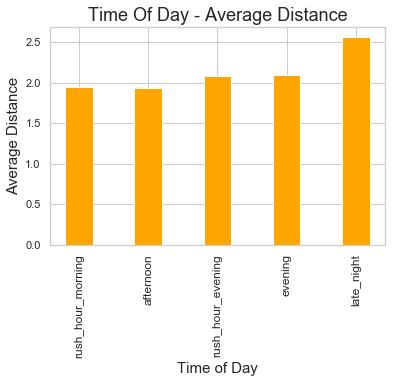

In [0]:
plt.bar(newtimecount['time_of_day'], newtimecount['average_distance'], width= 0.4, color='orange')
plt.xlabel('Time of Day', fontsize=15)
plt.ylabel("Average Distance", fontsize=15)
plt.title("Time Of Day - Average Distance", fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.show()

## Is The Average Trip Duration Affected By The Time Of Day?

In [0]:
time_group[['time_of_day','trip_duration']]

,time_of_day,trip_duration
0,afternoon,38317857
1,evening,31449194
2,late_night,18645303
3,rush_hour_evening,11847255
4,rush_hour_morning,9319905


Let's make it ordered to see better.

In [0]:
trip_dur = [9319905,38317857,11847255,31449194,18645303]
newtimecount['total_trip_duration'] = trip_dur
newtimecount['average_trip_duration'] = newtimecount['total_trip_duration'] / newtimecount['amount_of_time']
newtimecount

,time_of_day,average_distance,amount_of_time,total_trip_duration,average_trip_duration
0,rush_hour_morning,1.943823,10147,9319905,918.488716
1,afternoon,1.932456,39752,38317857,963.922746
2,rush_hour_evening,2.077128,11564,11847255,1024.494552
3,evening,2.099076,35194,31449194,893.595329
4,late_night,2.558580,21528,18645303,866.095457


It can be easily seen that in the rush hour evening, average trip duration is the most which is almost 17 minutes. Late night is the least one which is almost 14 minutes which is not so much different from the rush hour evenings' trip duration. 

The average trip duration increases from rush hour morning to rush hour evening, then it decreases. However, it does not give us so clear results to prove that the average trip duration is affected by the time of day. For this proof, we should use statistical tests to get more clear results.

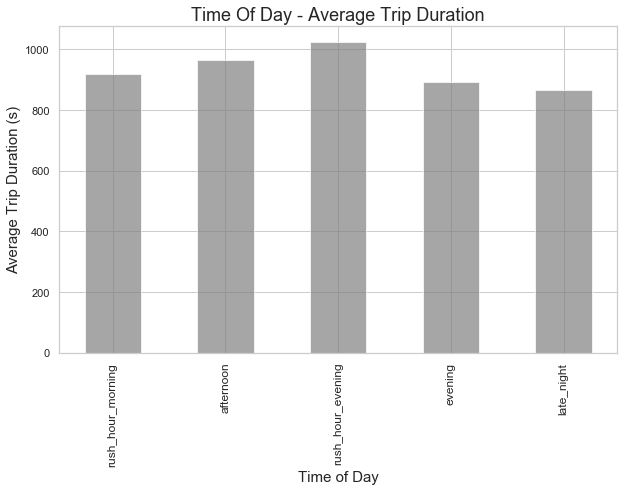

In [0]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

plt.bar(newtimecount['time_of_day'], newtimecount['average_trip_duration'], width=0.5, color='gray', alpha=0.7, align='center')
plt.xlabel('Time of Day', fontsize=15)
plt.ylabel("Average Trip Duration (s)", fontsize=15)
plt.title("Time Of Day - Average Trip Duration", fontsize=18)
plt.xticks(fontsize=12, rotation=90)

plt.show()

## Null Hypothesis: Passenger Group Size Has No Effect On The Distance.

In this part, we will look for does passenger group size have an effect on the distance.

First let's get the information from the data with grouping the passenger group size and get their total and average distances. The graph below helps us to see the results better.

In [0]:
datapeople=df.groupby(by='passenger_count').size().reset_index(name='counts')

copy_datapeople=df.groupby(by='passenger_count').sum()
datapeople['total_distances']=copy_datapeople['distance']

datapeople['avg_distance'] = datapeople['total_distances'] / datapeople['counts']

datapeople

,passenger_count,counts,total_distances,avg_distance
0,0,6,11.993007,1.998835
1,1,84290,176102.875118,2.089250
2,2,16800,37146.580726,2.211106
3,3,4634,9838.713510,2.123158
4,4,2188,4656.539575,2.128217
5,5,6296,13389.453205,2.126660
6,6,3971,8372.702339,2.108462


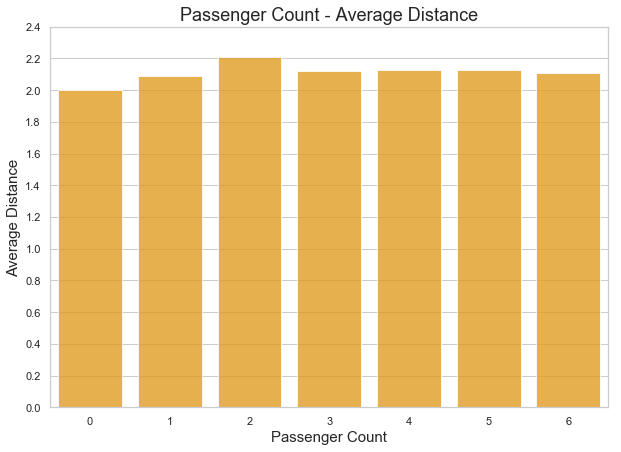

In [0]:
fig = plt.figure(figsize=(10,7))
ax = sns.barplot(datapeople['passenger_count'], datapeople['avg_distance'], color='orange', alpha=0.8)
plt.xlabel('Passenger Count', fontsize=15)
plt.ylabel("Average Distance", fontsize=15)
plt.title("Passenger Count - Average Distance", fontsize=18)
plt.yticks(np.arange(0, 2.5, step=0.2))
plt.show()

The differences of the average distances for every passenger group size almost same with each other. Only the group that has 2 people used taxis for little longer distance.

To get the true result for this research, we will use ANOVA which is an statistical test to compare more than two samples. 

ANOVA is a good statistical test for more than two samples but it doesn't show us for which samples we can reject the Null Hypothesis. Therefore we did tukey hsd test to see which samples we can reject the hypothesis.

In [0]:
people0=df[df['passenger_count'] == 0]['distance']
people1=df[df['passenger_count'] == 1]['distance']
people2=df[df['passenger_count'] == 2]['distance']
people3=df[df['passenger_count'] == 3]['distance']
people4=df[df['passenger_count'] == 4]['distance']
people5=df[df['passenger_count'] == 5]['distance']
people6=df[df['passenger_count'] == 6]['distance']

In [0]:
stats.f_oneway(people0, people1, people2, people3, people4, people5, people6)

F_onewayResult(statistic=6.070654612089595, pvalue=2.285100663034983e-06)

If we set the significance level 0.05 which is more than p value obviously, we can reject the null hypothesis but we cannot know which for which samples we can reject. So let's use the tukey hsd test to see this.

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [0]:
mc = MultiComparison(df['distance'], df['passenger_count'])
outcome = mc.tukeyhsd()
 
print(outcome)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.0904  -2.8081 2.9889 False 
  0      2     0.2123  -2.6866 3.1112 False 
  0      3     0.1243  -2.7759 3.0246 False 
  0      4     0.1294   -2.773 3.0317 False 
  0      5     0.1278  -2.7719 3.0276 False 
  0      6     0.1096   -2.791 3.0102 False 
  1      2     0.1219   0.0619 0.1818  True 
  1      3     0.0339  -0.0732 0.141  False 
  1      4     0.039   -0.1148 0.1927 False 
  1      5     0.0374  -0.0553 0.1302 False 
  1      6     0.0192  -0.0961 0.1345 False 
  2      3    -0.0879  -0.2057 0.0299 False 
  2      4    -0.0829  -0.2442 0.0785 False 
  2      5    -0.0844  -0.1894 0.0205 False 
  2      6    -0.1026  -0.2279 0.0226 False 
  3      4     0.0051  -0.1791 0.1892 False 
  3      5     0.0035  -0.1339 0.1409 False 
  3      6    -0.0147  -0.1682 0.1388 False 
  4      5    -0.0016  -0.1777 0.1746 False 
  4 

### Result:
It is clear to see that actually we cannot reject the Null Hypothesis for almost all the samples after the tukey hsd test. Only when passenger group size pair of 1 and 2 ,it can be said there is an effect of the passenger group size on distance. However for other samples, we cannot reject the Null Hypothesis.

## Null hypothesis: The Day Of The Week Has No Effect On The Distance.

In this part, we will look for does the day of the week has an effect on the distance of taxis.

For this, first let's get the average distances for each day by dividing total distances for each day to amount of trips in that day.

In this research, the days of the week are represented as numbers.

    0 = 'Monday', 1 = 'Tuesday', 2 = 'Wednesday', 3 = 'Thursday', 4 = 'Friday', 5 = 'Saturday', 6 = 'Sunday'

In [0]:
df['days']=pd.DatetimeIndex(df['pickup_datetime']).weekday
days=df.groupby(by='days').size().reset_index(name='counts')

In [0]:
days['distances'] = df.groupby(by='days').sum()['distance']
days['avg_distance'] = days['distances'] / days['counts']

In [0]:
days

,days,counts,distances,avg_distance
0,0,15486,32899.233069,2.124450
1,1,15718,32475.186102,2.066114
2,2,16705,34802.647471,2.083367
3,3,17445,36399.010453,2.086501
4,4,18117,37544.149913,2.072316
5,5,18838,38486.257794,2.043012
6,6,15876,36912.372678,2.325042


We can see that passengers used taxis for longer trips in Sunday than other days. In addition, taxis were used for shorter trips by passengers than other days.

Let's use an statistical test (ANOVA because we have 7 sample) to see whether we can reject the Null Hypothesis or not.

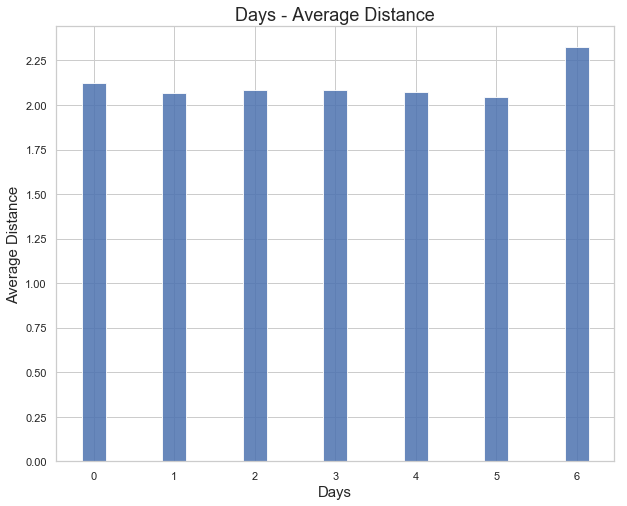

In [0]:
fig = plt.figure(figsize=(10,8))
ax = plt.bar(days['days'], days['avg_distance'], width=0.3, alpha=0.85)
plt.xlabel('Days', fontsize=15)
plt.ylabel("Average Distance", fontsize=15)
plt.title("Days - Average Distance", fontsize=18)
plt.yticks(np.arange(0, 2.5, step=0.25))

plt.show()

In [0]:
day0=df[df['days'] == 0]['distance']
day1=df[df['days'] == 1]['distance']
day2=df[df['days'] == 2]['distance']
day3=df[df['days'] == 3]['distance']
day4=df[df['days'] == 4]['distance']
day5=df[df['days'] == 5]['distance']
day6=df[df['days'] == 6]['distance']

In [0]:
stats.f_oneway(day0, day1, day2, day3, day4, day5, day6)

F_onewayResult(statistic=25.8725746286227, pvalue=6.340651481233433e-31)

If we set the significance level to 0.05, we can reject the Null Hypothesis but we should use tukey hsd test to see for which samples we can reject.

In [0]:
mc2 = MultiComparison(df['distance'], df['days'])
outcome2 = mc2.tukeyhsd()
 
print(outcome2)
print(mc2.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.0583  -0.1387  0.022  False 
  0      2    -0.0411  -0.1202  0.0381 False 
  0      3    -0.0379  -0.1163  0.0404 False 
  0      4    -0.0521  -0.1298  0.0255 False 
  0      5    -0.0814  -0.1584 -0.0045  True 
  0      6     0.2006   0.1204  0.2807  True 
  1      2     0.0173  -0.0616  0.0961 False 
  1      3     0.0204  -0.0577  0.0984 False 
  1      4     0.0062  -0.0711  0.0836 False 
  1      5    -0.0231  -0.0998  0.0536 False 
  1      6     0.2589   0.1791  0.3388  True 
  2      3     0.0031  -0.0737  0.0799 False 
  2      4    -0.0111  -0.0872  0.0651 False 
  2      5    -0.0404  -0.1158  0.0351 False 
  2      6     0.2417   0.163   0.3203  True 
  3      4    -0.0142  -0.0895  0.0611 False 
  3      5    -0.0435  -0.1181  0.0311 False 
  3      6     0.2385   0.1607  0.3164  True 
  4      5    -0.0293  -0.103

### Result:
For some of the sample pair, we can reject the Null Hypothesis which is mostly consist of Saturday and Sunday. It shows us that Saturday and Sunday has an effect on the average distance of taxi trips but we cannot say this for the weekdays.